# **Travel Aggregator Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

In [4]:
dist_bookings = bookings['booking_id'].nunique()
dist_sessions = sessions['session_id'].nunique()
dist_searches = sessions['search_id'].nunique()
print("No of distinct bookings : ",dist_bookings)
print("No of distinct sessions : ",dist_sessions)
print("No of distinct searches : ",dist_searches)

No of distinct bookings :  339
No of distinct sessions :  331
No of distinct searches :  1360


***2***

In [5]:
bookings_per_session = sessions.groupby('session_id')['booking_id'].nunique()
print(bookings_per_session)

session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 331, dtype: int64


In [6]:
session_with_more_bookings = bookings_per_session[bookings_per_session > 1]
print(session_with_more_bookings)

session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64


In [7]:
sessions_count = session_with_more_bookings.count()
print("Number of sessions having more than one booking: ",sessions_count)

Number of sessions having more than one booking:  10


***3***

In [8]:
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_the_week'] = bookings['booking_time'].dt.day_name()
print(bookings['day_of_the_week'])

0      Wednesday
1      Wednesday
2         Monday
3         Friday
4        Tuesday
         ...    
334       Friday
335     Saturday
336       Friday
337     Thursday
338       Monday
Name: day_of_the_week, Length: 339, dtype: object


In [9]:
daywise_count = bookings['day_of_the_week'].value_counts()
print(daywise_count)

day_of_the_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


In [10]:
day_with_high_booking = daywise_count.idxmax()
total_days = daywise_count.max()
print(f"The days with highest number of booking is {day_with_high_booking} with {total_days} bookings.")

The days with highest number of booking is Thursday with 65 bookings.


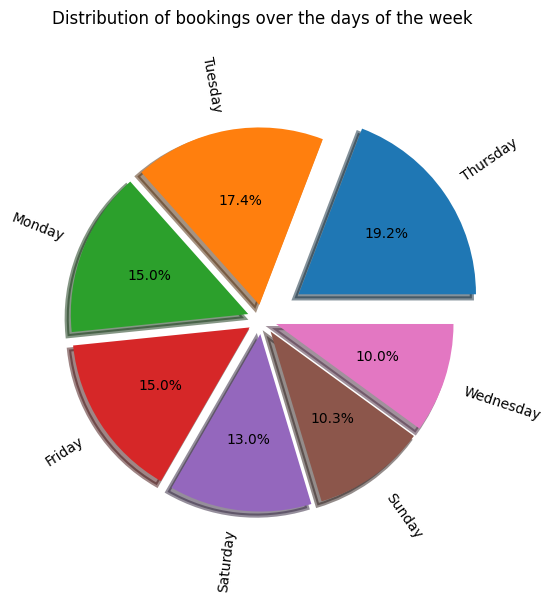

In [11]:
colors = ['#0099cc', '#cc66ff', '#66ff66', '#ff6666', '#00cc99', '#c68c53']
explode=[0.3,0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Distribution of bookings over the days of the week", pad=80)
plt.pie(daywise_count, labels=daywise_count.index, autopct="%1.1f%%", rotatelabels=True, explode=explode, shadow=True,
        radius=1.2, wedgeprops= {'linewidth':3})
plt.show()

***4***

In [15]:
bookings_per_services = bookings.groupby('service_name').agg(
    Total_no_of_bookings=('booking_id','count'),
    Total_Gross_Booking_Value=('INR_Amount','sum')
).reset_index()
bookings_per_services

,service_name,Total_no_of_bookings,Total_Gross_Booking_Value
0,GOIBIBO,186,5897637.97
1,MMT,48,665669.08
2,YATRA,105,3378702.13


***5***

In [22]:
customer_bookings = bookings.groupby('customer_id')['booking_id'].nunique()
cust_with_more_bookings = customer_bookings[customer_bookings > 1].index
cust_with_more_bookings

Index(['customer_120', 'customer_137', 'customer_144', 'customer_155',
       'customer_160', 'customer_176', 'customer_179', 'customer_200',
       'customer_217', 'customer_230', 'customer_235', 'customer_237',
       'customer_245', 'customer_246', 'customer_247', 'customer_255',
       'customer_265', 'customer_28', 'customer_282', 'customer_297',
       'customer_33', 'customer_44', 'customer_49', 'customer_67',
       'customer_93', 'customer_97'],
      dtype='object', name='customer_id')

In [41]:
most_booked_route = bookings[bookings['customer_id'].isin(cust_with_more_bookings)]
most_booked_route = most_booked_route.groupby(['from_city','to_city']).size().idxmax()
print('The most Booked route with more than one booking:')
print(most_booked_route)

The most Booked route with more than one booking: ('Gurgaon', 'Roissy-en-France')
('Gurgaon', 'Roissy-en-France')


***6***

In [46]:
city_with_more_departures = bookings['from_city'].value_counts()
top_cities = city_with_more_departures[city_with_more_departures >= 5].index

filtered_cities = bookings[bookings['from_city'].isin(top_cities)]

avg_days_to_departure = bookings.groupby('from_city')['days_to_departure'].mean().reset_index()

top_most_cities = avg_days_to_departure.sort_values(by='days_to_departure', ascending=False).head(3)
print('The top three cities with more number of bookings in advance are:')
print(top_most_cities)

The top three cities with more number of bookings in advance are:
   from_city  days_to_departure
13   Durlaga          58.500000
7    Bālāpur          46.166667
22     Kochi          45.500000


***7***

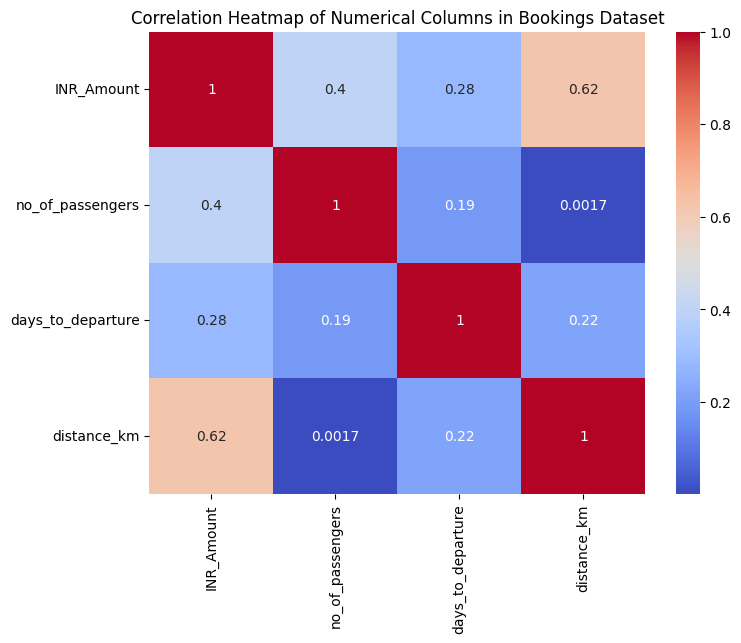

The highest correlation is between INR_Amountand distance_km with a correlation of 0.62


In [13]:
numeric_data = bookings.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=[8,6])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Columns in Bookings Dataset")
plt.show()

corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked < 1]
max_corr_pair = corr_unstacked.idxmax()
max_corr_value = corr_unstacked.max()
print(f"The highest correlation is between {max_corr_pair[0]}and {max_corr_pair[1]} with a correlation of {max_corr_value:.2f}")